<a href="https://colab.research.google.com/github/juniorPalomino25/Python/blob/main/DL05PrediccionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar datos

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Cantidad de imágenes de entrenamiento y de prueba

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
num_ima_ent = X_train.shape[0]
num_ima_pru = X_test.shape[0]
altura_ima = X_train.shape[1]
ancho_ima = X_train.shape[2]
print("Dimensión de los datos de entrenamiento: " + str(X_train.shape))
print("Dimensión de los datos de prueba: " + str(X_test.shape))
print("Altura de cada imagen: " + str(altura_ima))
print("Ancho de cada imagen: " + str(ancho_ima))

Dimensión de los datos de entrenamiento: (60000, 28, 28)
Dimensión de los datos de prueba: (10000, 28, 28)
Altura de cada imagen: 28
Ancho de cada imagen: 28


# Mostrar imágenes

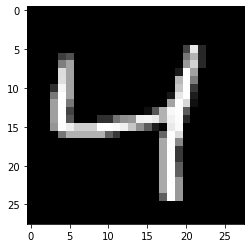

In [5]:
#Mostrar una imagen
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))

crear una matriz de figuras, donde mostramos un conjunto de figuras, desde la 0 hasta la 11

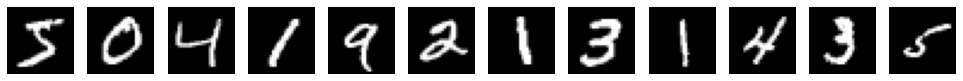

In [7]:
fig, axs = plt.subplots(1,12,figsize=(17,6))
for i in range(12):
  axs[i].imshow(X_train[i],cmap = plt.get_cmap('gray'))
  axs[i].axis('off')

# Preparación y transformación de los datos

In [8]:
from keras.utils import np_utils

In [9]:
# redimensionamiento de la matriz para la red neuronal
X_train = X_train.reshape(num_ima_ent,altura_ima*ancho_ima).astype('float32')
X_test = X_test.reshape(num_ima_pru,altura_ima*ancho_ima).astype('float32')
print("Dimensión de los datos de entrenamiento: " + str(X_train.shape))
print("Dimensión de los datos de prueba: " + str(X_test.shape))
print("Dimensión de la salida de entrenamiento: "+str(y_train.shape))
print("Dimensión de la salida de prueba: "+str(y_test.shape))

Dimensión de los datos de entrenamiento: (60000, 784)
Dimensión de los datos de prueba: (10000, 784)
Dimensión de la salida de entrenamiento: (60000,)
Dimensión de la salida de prueba: (10000,)


In [10]:
# Transforma los valores de escala de grises que están entre [0,255]
# a valores entre [0,1] para mejorar los resultados
X_train = X_train/255
X_test = X_test/255

In [11]:
#Los valores de la salida están entre 0 y 9 por ejemplo
print(y_train[2])
print(y_train[5])

4
2


In [12]:
# Transformar las salidas entre 0 y 9 a salidas categoricas
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train[2])
print(y_train[5])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
# Cantidad de clases actual
num_clases = y_test.shape[1]
print(num_clases)

10


# Modelo de Red Neuronal

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
modelo = Sequential()
modelo.add(Dense(500,input_dim = altura_ima*ancho_ima,activation='relu'))
modelo.add(Dense(10,activation='softmax'))
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
EPOCAS = 50
modelo.compile(loss='categorical_crossentropy',optimizer='adam',
metrics=['accuracy'])
historia = modelo.fit(X_train,y_train,validation_data=(X_test,y_test),
epochs = EPOCAS,batch_size=256,verbose=0)

# Función para graficar 'loss' y 'accuracy' vs EPOCAS

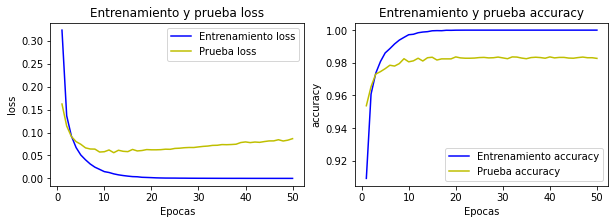

In [17]:
import numpy as np
def graficar(h):
  LOSS = 0; ACCURACY = 1
  entrenamiento = np.zeros((2,EPOCAS));
  prueba = np.zeros((2,EPOCAS));
  entrenamiento[LOSS] = h.history['loss'] # loss de entrenamiento
  prueba[LOSS] = h.history['val_loss'] # loss de validación
  entrenamiento[ACCURACY] = h.history['accuracy'] #acc de entrenamiento
  prueba[ACCURACY] = h.history['val_accuracy'] #acc de validación
  epocas = range(1,EPOCAS+1)
  fig, axs = plt.subplots(1,2,figsize=(10,3))
  for i, label in zip((LOSS,ACCURACY),('loss','accuracy')):
    axs[i].plot(epocas,entrenamiento[i],'b-',label='Entrenamiento '+label)
    axs[i].plot(epocas,prueba[i],'y-',label='Prueba '+label)
    axs[i].set_title('Entrenamiento y prueba ' + label)
    axs[i].set_xlabel('Epocas')
    axs[i].set_ylabel(label)
    axs[i].legend()
  plt.show()
graficar(historia)

En el modelo anterior existe Overfitting (Sobreajuste) para reducir el overfitting probaremos con:

1.   Simplificar la complejidad (grados de libertad): Reducir cantidad de neuronas en las capas ocultas
2.   Aplicar regularización.




In [18]:
modelo = Sequential()
modelo.add(Dense(50,input_dim = altura_ima*ancho_ima,activation='relu'))
modelo.add(Dense(10,activation='softmax'))
print(modelo.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
None


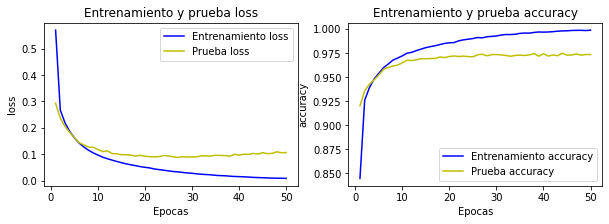

In [19]:
modelo.compile(loss='categorical_crossentropy',optimizer='adam',
metrics=['accuracy'])
historia = modelo.fit(X_train,y_train,validation_data=(X_test,y_test),
epochs = EPOCAS,batch_size=256,verbose=0)
graficar(historia)

Disminuyó el overfitting, disminuyó el accuracy.

**Aplicar Regularización**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
None


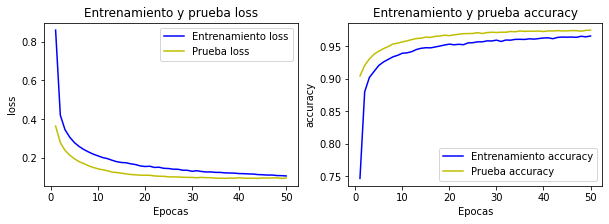

In [20]:
from keras.layers import Dropout
modelo = Sequential()
modelo.add(Dense(50,input_dim = altura_ima*ancho_ima,activation='relu'))
modelo.add(Dropout(0.3)) #El 30% de los pesos se hacen igual a cero
modelo.add(Dense(10,activation='softmax'))
print(modelo.summary())
modelo.compile(loss='categorical_crossentropy',optimizer='adam',
metrics=['accuracy'])
historia = modelo.fit(X_train,y_train,validation_data=(X_test,y_test),
epochs = EPOCAS,batch_size=512,verbose=0)
graficar(historia)

Se redujo el overffiting y se tiene un modelo más estable.

**Después de muchas pruebas**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________
None


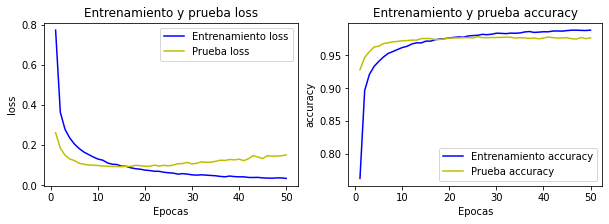

In [21]:
modelo = Sequential()
modelo.add(Dense(100,input_dim = altura_ima*ancho_ima,activation='relu'))
modelo.add(Dense(20,activation='relu'))
modelo.add(Dropout(0.3)) #El 30% de los pesos se hacen igual a cero
modelo.add(Dense(10,activation='softmax'))
print(modelo.summary())
modelo.compile(loss='categorical_crossentropy',optimizer='adam',
metrics=['accuracy'])
historia = modelo.fit(X_train,y_train,validation_data=(X_test,y_test),
epochs = EPOCAS,batch_size=256,verbose=0)
graficar(historia)